# Natural Language Processing using NLTK

In [1]:
# Install NLTK - pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## NLP Part 0 - Get some Data!

This section's code is mostly given to you as a review for how you can scrape and manipulate data from the web. 

In [14]:
import urllib
import bs4 as bs
import re

In [15]:
# We will read the contents of the Wikipedia article "Global_warming" as an example, please feel free to use your own! You can use the url below:
url = 'https://en.wikipedia.org/wiki/Solar_System' # you can change this to use other sites as well.

# We can open the page using "urllib.request.urlopen" then read it using ".read()"
source = urllib.request.urlopen(url).read()

# Beautiful Soup is a Python library for pulling data out of HTML and XML files.
# you may need to install a parser library --> "!pip3 install lxml"
# Parsing the data/creating BeautifulSoup object

soup = bs.BeautifulSoup(source,"html.parser") 

# Fetching the data
text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    text += paragraph.text

# Preprocessing the data

text = re.sub(r'\[[0-9]*\]',' ',text) # [0-9]* --> Matches zero or more repetitions of any digit from 0 to 9
text = text.lower() #everything to lowercase
text = re.sub(r'\W^.?!',' ',text) # \W --> Matches any character which is not a word character except (.?!)
text = re.sub(r'\d',' ',text) # \d --> Matches any decimal digit
text = re.sub(r'\s+',' ',text) # \s --> Matches any characters that are considered whitespace (Ex: [\t\n\r\f\v].)

In [16]:
text[:100]

' the solar system[c] is the gravitationally bound system of the sun and the objects that orbit it. i'

## NLP Part 1 - Tokenization of paragraphs/sentences

In this section we are going to tokenize our sentences and words. If you aren't familiar with tokenization, we recommend looking up "what is tokenization". 

You should also spend time on the [NLTK documentation](https://www.nltk.org/). If you're not sure how to do something, or get an error, it is best to google it first and ask questions as you go!



In [17]:
'''
Your code here: Tokenize the words from the data and set it to a variable called words.
Hint: how to this might be on the very home page of NLTK!
'''
words = nltk.word_tokenize(text)

In [18]:
print(words[:10])

['the', 'solar', 'system', '[', 'c', ']', 'is', 'the', 'gravitationally', 'bound']


In [21]:
'''
Your code here: Tokenize the sentences from the data  and set it to a variable called sentences.
Hint: try googling how to tokenize sentences in NLTK!
'''
sentences = nltk.sent_tokenize(text)

In [22]:
print(sentences[:10])

[' the solar system[c] is the gravitationally bound system of the sun and the objects that orbit it.', 'it formed .', 'billion years ago from the gravitational collapse of a giant interstellar molecular cloud.', 'the vast majority ( .', "%) of the system's mass is in the sun, with most of the remaining mass contained in the planet jupiter.", 'the four inner system planets—mercury, venus, earth and mars—are terrestrial planets, being composed primarily of rock and metal.', 'the four giant planets of the outer system are substantially larger and more massive than the terrestrials.', 'the two largest, jupiter and saturn, are gas giants, being composed mainly of hydrogen and helium; the next two, uranus and neptune, are ice giants, being composed mostly of volatile substances with relatively high melting points compared with hydrogen and helium, such as water, ammonia, and methane.', "all eight planets have nearly circular orbits that lie near the plane of earth's orbit, called the eclipti

## NLP Part 2 - Stopwords and Punctuation
Now we are going to work to remove stopwords and punctuation from our data. Why do you think we are going to do this? Do some research if you don't know yet. 

In [23]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
'''
define a function called "remove_stopwords" that takes in a list of the sentences of the text and returns one that doesn't have any stopwords.
'''
def remove_stopwords(sentences):
    
    ### Some code goes here. Hint: You may have to look up how to remove stopwords in NLTK if you get stuck. ###
    for i in range(len(sentences)):
        # i = position of each sentence; i is a number
        words = []
        
        word_list = nltk.word_tokenize(sentences[i])
        
        for word in word_list:
            if word not in stopwords.words ('english'):
                words.append(word)
        
        sentences[i] = ' '.join(words)
        
    return sentences

###Then actually apply your function###
sentences = remove_stopwords(sentences)
print(sentences[:10]) #Check if it worked correctly. Are all stopwords removed?

['solar system [ c ] gravitationally bound system sun objects orbit .', 'formed .', 'billion years ago gravitational collapse giant interstellar molecular cloud .', 'vast majority ( .', "% ) system 's mass sun , remaining mass contained planet jupiter .", 'four inner system planets—mercury , venus , earth mars—are terrestrial planets , composed primarily rock metal .', 'four giant planets outer system substantially larger massive terrestrials .', 'two largest , jupiter saturn , gas giants , composed mainly hydrogen helium ; next two , uranus neptune , ice giants , composed mostly volatile substances relatively high melting points compared hydrogen helium , water , ammonia , methane .', "eight planets nearly circular orbits lie near plane earth 's orbit , called ecliptic .", 'unknown number smaller dwarf planets innumerable small solar system bodies orbiting sun .']


In [26]:
'''
define a function called "remove_punctuation" that removes punctuation from the sentences.
'''
def remove_punctuation(sentences):
    
    ### Some code goes here. Hint: Try looking up how to remove stopwords in NLTK if you get stuck. ###
    for i in range(len(sentences)):
        # i = position of each sentence; i is a number
        words = []

        word_list = nltk.word_tokenize(sentences[i])

        for word in word_list:
            if word not in ",.?/''()":
                words.append(word)

        sentences[i] = ' '.join(words)

    return sentences
sentences = remove_punctuation(sentences)
print(sentences[:10]) #eliminating all punctuation.

['solar system [ c ] gravitationally bound system sun objects orbit', 'formed', 'billion years ago gravitational collapse giant interstellar molecular cloud', 'vast majority', "% system 's mass sun remaining mass contained planet jupiter", 'four inner system planets—mercury venus earth mars—are terrestrial planets composed primarily rock metal', 'four giant planets outer system substantially larger massive terrestrials', 'two largest jupiter saturn gas giants composed mainly hydrogen helium ; next two uranus neptune ice giants composed mostly volatile substances relatively high melting points compared hydrogen helium water ammonia methane', "eight planets nearly circular orbits lie near plane earth 's orbit called ecliptic", 'unknown number smaller dwarf planets innumerable small solar system bodies orbiting sun']


## NLP Part 3a - Stemming the words
Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. There is an example below!

In [27]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
# try each of the words below
stemmer.stem('troubled')
stemmer.stem('trouble')
stemmer.stem('troubling')
stemmer.stem('troubles')

'troubl'

In [28]:
'''
Your code here:
Define a function called "stem_sentences" that takes in a list of sentences and returns a list of stemmed sentences.
'''
def stem_sentences(sentences):
    ### Some code goes here. Hint: Try looking up how to stem words in NLTK if you get stuck (or simply use the example above and run stemmer in a loop!). ###
    for i in range(len(sentences)):
        # i = position of each sentence; i is a number
        words = []
        
        word_list = nltk.word_tokenize(sentences[i])
        
        for word in word_list:
            words.append(stemmer.stem(word))
        
        sentences[i] = ' '.join(words)
        
    return sentences
sentences = stem_sentences(sentences)
print(sentences[:10]) # eliminating all stems from every word that is not in base form

['solar system [ c ] gravit bound system sun object orbit', 'form', 'billion year ago gravit collaps giant interstellar molecular cloud', 'vast major', "% system 's mass sun remain mass contain planet jupit", 'four inner system planets—mercuri venu earth mars—ar terrestri planet compos primarili rock metal', 'four giant planet outer system substanti larger massiv terrestri', 'two largest jupit saturn ga giant compos mainli hydrogen helium ; next two uranu neptun ice giant compos mostli volatil substanc rel high melt point compar hydrogen helium water ammonia methan', "eight planet nearli circular orbit lie near plane earth 's orbit call eclipt", 'unknown number smaller dwarf planet innumer small solar system bodi orbit sun']


In [30]:
print(sentences[:10])

['solar system [ c ] gravit bound system sun object orbit', 'form', 'billion year ago gravit collaps giant interstellar molecular cloud', 'vast major', "% system 's mass sun remain mass contain planet jupit", 'four inner system planets—mercuri venu earth mars—ar terrestri planet compos primarili rock metal', 'four giant planet outer system substanti larger massiv terrestri', 'two largest jupit saturn ga giant compos mainli hydrogen helium ; next two uranu neptun ice giant compos mostli volatil substanc rel high melt point compar hydrogen helium water ammonia methan', "eight planet nearli circular orbit lie near plane earth 's orbit call eclipt", 'unknown number smaller dwarf planet innumer small solar system bodi orbit sun']


## NLP Part 3b - Lemmatization

Lemmatization considers the context and converts the word to its meaningful base form. There is a cool tutorial and definition of lemmatization in NLTK [here](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/).



In [31]:
from nltk.stem import WordNetLemmatizer
    
## Step 1: Import the lemmatizer
lemmatizer = WordNetLemmatizer()

'''
Your code here: Define a function called "lem_sentences" that: loops through the sentences, split the sentences up by words and applies "lemmatizer.lemmatize" to each word and then join everything back into a sentence
'''
##Similar to stopwords: For loop through the sentences, split by words and apply "lemmatizer.lemmatize" to each word and join back into a sentence
def lem_sentences(sentences):
    
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        
        words = [lemmatizer.lemmatize(word) for word in words]
        
        sentences[i] = ' '.join(words)
        
    return sentences
sentences = lem_sentences(sentences)
print(sentences[:10]) 

['solar system [ c ] gravit bound system sun object orbit', 'form', 'billion year ago gravit collaps giant interstellar molecular cloud', 'vast major', "% system 's mass sun remain mass contain planet jupit", 'four inner system planets—mercuri venu earth mars—ar terrestri planet compos primarili rock metal', 'four giant planet outer system substanti larger massiv terrestri', 'two largest jupit saturn ga giant compos mainli hydrogen helium ; next two uranu neptun ice giant compos mostli volatil substanc rel high melt point compar hydrogen helium water ammonia methan', "eight planet nearli circular orbit lie near plane earth 's orbit call eclipt", 'unknown number smaller dwarf planet innumer small solar system bodi orbit sun']


In [32]:
print(sentences[:10]) 

['solar system [ c ] gravit bound system sun object orbit', 'form', 'billion year ago gravit collaps giant interstellar molecular cloud', 'vast major', "% system 's mass sun remain mass contain planet jupit", 'four inner system planets—mercuri venu earth mars—ar terrestri planet compos primarili rock metal', 'four giant planet outer system substanti larger massiv terrestri', 'two largest jupit saturn ga giant compos mainli hydrogen helium ; next two uranu neptun ice giant compos mostli volatil substanc rel high melt point compar hydrogen helium water ammonia methan', "eight planet nearli circular orbit lie near plane earth 's orbit call eclipt", 'unknown number smaller dwarf planet innumer small solar system bodi orbit sun']


## NLP Part 4 - POS Tagging
Parts of speech tagging is marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context.

In [33]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
# POS Tagging example
# CC - coordinating conjunction
# NN - noun, singular (cat, tree)
all_words = nltk.word_tokenize(text)  ###If we want to look at part of speech taking before we stem/lem

tagged_words = nltk.pos_tag(all_words)
##Creates a list of lists where each element of the list is [word,partofspeech abbreviation]

# Tagged word paragraph
word_tags = []
for tw in tagged_words:
    word_tags.append(tw[0]+"_"+tw[1])

tagged_paragraph = ' '.join(word_tags)

'''
Your code here: print the first 1000 characters of tagged_paragraph.
'''
tagged_paragraph[:1000]

"the_DT solar_JJ system_NN [_NNP c_NN ]_NN is_VBZ the_DT gravitationally_RB bound_JJ system_NN of_IN the_DT sun_NN and_CC the_DT objects_NNS that_WDT orbit_VBP it_PRP ._. it_PRP formed_VBD ._. billion_CD years_NNS ago_RB from_IN the_DT gravitational_JJ collapse_NN of_IN a_DT giant_JJ interstellar_JJ molecular_JJ cloud_NN ._. the_DT vast_JJ majority_NN (_( ._. %_NN )_) of_IN the_DT system_NN 's_POS mass_NN is_VBZ in_IN the_DT sun_NN ,_, with_IN most_JJS of_IN the_DT remaining_VBG mass_NN contained_VBN in_IN the_DT planet_NN jupiter_NN ._. the_DT four_CD inner_NN system_NN planets—mercury_NN ,_, venus_NN ,_, earth_NN and_CC mars—are_NN terrestrial_JJ planets_NNS ,_, being_VBG composed_VBN primarily_RB of_IN rock_NN and_CC metal_NN ._. the_DT four_CD giant_JJ planets_NNS of_IN the_DT outer_NN system_NN are_VBP substantially_RB larger_JJR and_CC more_RBR massive_JJ than_IN the_DT terrestrials_NNS ._. the_DT two_CD largest_JJS ,_, jupiter_NN and_CC saturn_NN ,_, are_VBP gas_NN giants_NNS ,_

# Word2Vec Model Visualization

In [37]:
# Install gensim - pip install gensim
import nltk
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
#Let's go ahead and create a list that's formatted how word2vec needs:
    # a list of lists where the ith entry in the list is the word tokenization of the ith sentence (after preprocessing)
tokenized = []

for sentence in sentences:
    tokenized.append(nltk.word_tokenize(sentence))

In [42]:
# print the tokenized list of lists
tokenized[:10]

[['solar',
  'system',
  '[',
  'c',
  ']',
  'gravit',
  'bound',
  'system',
  'sun',
  'object',
  'orbit'],
 ['form'],
 ['billion',
  'year',
  'ago',
  'gravit',
  'collaps',
  'giant',
  'interstellar',
  'molecular',
  'cloud'],
 ['vast', 'major'],
 ['%',
  'system',
  "'s",
  'mass',
  'sun',
  'remain',
  'mass',
  'contain',
  'planet',
  'jupit'],
 ['four',
  'inner',
  'system',
  'planets—mercuri',
  'venu',
  'earth',
  'mars—ar',
  'terrestri',
  'planet',
  'compos',
  'primarili',
  'rock',
  'metal'],
 ['four',
  'giant',
  'planet',
  'outer',
  'system',
  'substanti',
  'larger',
  'massiv',
  'terrestri'],
 ['two',
  'largest',
  'jupit',
  'saturn',
  'ga',
  'giant',
  'compos',
  'mainli',
  'hydrogen',
  'helium',
  ';',
  'next',
  'two',
  'uranu',
  'neptun',
  'ice',
  'giant',
  'compos',
  'mostli',
  'volatil',
  'substanc',
  'rel',
  'high',
  'melt',
  'point',
  'compar',
  'hydrogen',
  'helium',
  'water',
  'ammonia',
  'methan'],
 ['eight',
  'p

## Training the Word2Vec model

For this part you may want to follow a guide [here](https://radimrehurek.com/gensim/models/word2vec.html). 

In [44]:
''' Training the Word2Vec model. You should pass:
1. a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence
2. min_count=1 --> Ignores all words with total frequency lower than 1 (i.e., include everything).
'''
# create the model
model = Word2Vec(tokenized, min_count=1)

# get the most common words of the model (it's entire vocabulary)
most_common_words = model.wv.index_to_key

# save the model to use it later
model.save("word2vec.model")

# model = Word2Vec.load("word2vec.model")

In [45]:
#print the first 10 most common words.
most_common_words[:10]

['sun',
 'planet',
 'system',
 'solar',
 'orbit',
 "'s",
 'object',
 'au',
 ';',
 'belt']

In [0]:
# Look up the most similar words to certain words in your text using the model.wv.most_similar() function

In [47]:
model.wv.most_similar('planet')

[("'s", 0.6326823234558105),
 ('sun', 0.6270672082901001),
 ('solar', 0.6227244734764099),
 ('system', 0.6065926551818848),
 ('orbit', 0.6057976484298706),
 ('``', 0.602124035358429),
 ('comet', 0.5705369114875793),
 ('creat', 0.5671244263648987),
 ('known', 0.5511392951011658),
 ('mass', 0.5510634779930115)]

## Testing our model

In [49]:
    # Finding Word Vectors - print word vectors for certain words in your text
vector = model.wv['planet']
print(vector)

[-1.5128465e-02  1.1608394e-02  7.3302579e-03  3.2547119e-03
  7.8544319e-03 -2.0531531e-02  3.9364831e-03  2.4511388e-02
 -9.1952840e-03 -8.7463697e-03 -4.7430517e-03 -1.9228622e-02
 -6.2649720e-03  9.2042787e-03  6.0813790e-03  1.9221344e-03
  6.1771148e-03 -7.0404192e-04 -6.0376492e-03 -1.7986486e-02
  5.2223024e-03 -1.9915923e-03  1.1086015e-02 -1.2467754e-02
  4.7098347e-03  3.3772083e-03 -1.0624319e-02 -2.9271655e-03
 -1.0391565e-02  8.5536847e-03  2.1145998e-02 -8.7895029e-04
  1.5726471e-03 -9.1704773e-03 -1.3407731e-05  1.2724730e-02
  1.1006199e-02 -1.2712035e-03  6.1578071e-03 -6.2377476e-03
  9.3280878e-03 -1.8075701e-02 -1.0818752e-02 -2.7444414e-03
  3.8092041e-03  6.3946447e-03  3.1514994e-03 -2.7698940e-03
  3.6011131e-03  4.5301500e-03  1.4809912e-02 -1.7501976e-02
 -2.6081540e-03  2.2135968e-03 -8.7033855e-03  1.2203348e-02
  1.3635290e-02  6.0444493e-03 -1.0940971e-02  8.0556115e-03
 -5.6755426e-03  6.4500794e-03 -5.2500479e-03 -8.8737868e-03
 -6.0605113e-03  1.34221

In [0]:
    ### Finding the most similar words in the model ###


In [0]:
similar1, similar2

<Figure size 432x288 with 0 Axes>

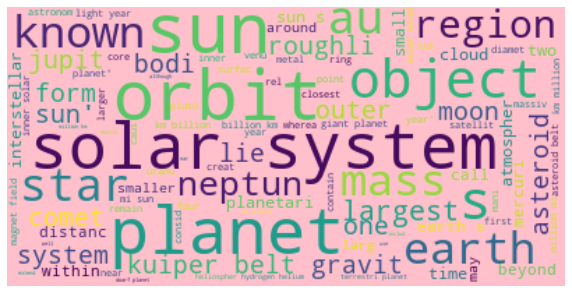

In [53]:
# code to print a wordcloud for your sentences
wordcloud = WordCloud(
                        background_color='pink',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42
                        ).generate(str(sentences))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Why did we do all this work?

In [55]:
# reFetching the data
lame_text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    lame_text += paragraph.text

In [0]:
'''
Doing the same without removing stop words or lemming
'''
# tokenize the text using sent_tokenize

# from this list of sentences, create a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)

In [57]:
# Redo the word cloud but set stopwords to empty so it looks really bad
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42, ###SET STOPWORDS = [] and/or include_numbers = True or you will get the same thing!!!
                        stopwords = [],
                        include_numbers = True).generate(str(lame_sentences)) 
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

NameError: name 'lame_sentences' is not defined

In [0]:
# Training the Word2Vec model (same code as before), but one change: use our lame data that was not preprocessed

# Try printing this after training the model.
words = model.wv.index_to_key
print(words[:10])

In [0]:
# Finding a vector of a word, but badly

In [0]:
### Finding the most similar words in the model but... you get the idea ###



## Reflection
How important do you think proper preprocessing in NLP is?